<a href="https://colab.research.google.com/github/ashok-python/data/blob/master/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = "https://raw.githubusercontent.com/ashok-python/data/master/salaries33.csv"
df = pd.read_csv(url)
df

,Name,Salary,Gender,Age
0,John,50000,Male,34
1,Samson,120000,Male,45
2,Jack,80000,Male,27
3,Jones,49900,Female,33
4,Sarala,121000,Female,44
5,Ayesha,79999,Female,26


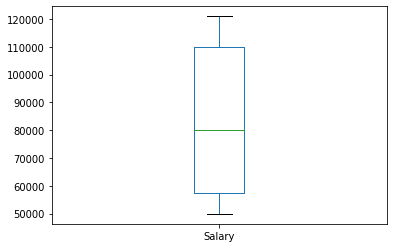

In [3]:
df.Salary.plot(kind='box')
plt.show()

In [0]:
#introduce outliers by adding some rows of data with extrem values

df=df.append({'Name':'Mary', 'Salary':15000, 'Gender':'Female', 'Age':29},ignore_index=True)
df=df.append({'Name':'Sandy', 'Salary':300000, 'Gender':'Female', 'Age':39},ignore_index=True)

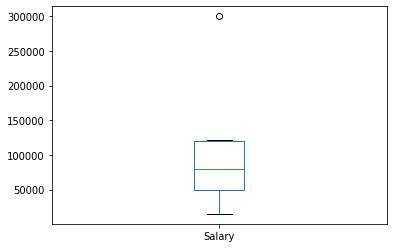

In [5]:
#Find out whether box plot identifies these extrems

df.Salary.plot(kind='box')
plt.show()


In [6]:
#Let us find outliers in salary column

n = len(df['Salary'])  #size of data series
n

8

In [7]:
#Create list from Salary column
sal_list = list(df.Salary.sort_values(ascending=True))
sal_list

[15000, 49900, 50000, 79999, 80000, 120000, 121000, 300000]

In [8]:
#Let us compute Lower quartile Q1

Q1_pos = (1/4) * (n+1)
Q1_pos

Q1_pos =int(Q1_pos+0.5)
Q1_pos

Q1 = sal_list[Q1_pos-1]
Q1


49900

In [0]:
#let us compute upper quartile(Q3)

#Q3 = (3/4) * (n+1) item in the list

Q3_pos = int((3/4) * (n+1)+0.5)
Q3_pos

Q3 = sal_list[Q3_pos - 1] #since list starts from 0 position

In [10]:
Q3

121000

In [11]:
#find Median(Quartile #Q2) = (1/2) * (n+1)

Q2_pos = (1/2) * (n+1)
Q2_pos = int(Q2_pos)

Q2 = sal_list[Q2_pos-1] #Note it starts from 0
Q2

79999

In [12]:
#Compute Inter Quartile Range(IQR) = Q3 - Q1

print('\nQ1 =\n', Q1)
print('\nQ2 =\n', Q2)
print('\nQ3 =\n', Q3)


Q1 =
 49900

Q2 =
 79999

Q3 =
 121000


In [13]:
IQR = Q3-Q1 #computing inter Quartile
#IQR

print('\nIQR =\n',IQR)

lower_limit = Q1 - 1.5 * IQR #compute lower
lower_limit

upper_limit = Q3 + 1.5 * IQR #compute upper limit
upper_limit

#So outliers are < lower_limit and > upper_limit

print('\nLower limit = ',lower_limit)
print('\nUpper limit = ',upper_limit)


IQR =
 71100

Lower limit =  -56750.0

Upper limit =  227650.0


In [14]:
#Let us verify from DataFrame if any outliers are available in salary range in this data

df.head(2)

#print min and max

print('\n Minimum Salary = \n',df['Salary'].min())
print('\nMaximum Salary = \n', df['Salary'].max())

#Verify outliers in the DataFrame for the both ends of quartiles

print('Outlier at lower end : \n',df[df['Salary'] < lower_limit])

print('\nOutlier at higher end : \n',df[df['Salary'] > upper_limit])



 Minimum Salary = 
 15000

Maximum Salary = 
 300000
Outlier at lower end : 
 Empty DataFrame
Columns: [Name, Salary, Gender, Age]
Index: []

Outlier at higher end : 
     Name  Salary  Gender  Age
7  Sandy  300000  Female   39


In [0]:
#Let us draw the box plot using Seaborn library

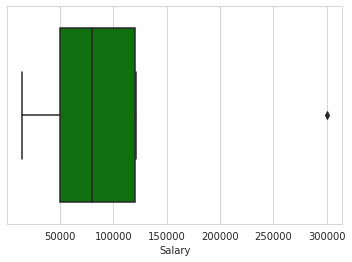

In [16]:
sns.set_style('whitegrid')
sns.boxplot(df['Salary'],color='green')
plt.show()